In [2]:
seed_value= 30
import numpy as np
np.random.seed(seed_value)
import matplotlib.pyplot as plt
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import cv2
from tqdm import tqdm
from random import shuffle
import random
random.seed(seed_value)

In [3]:
#DATADIR = "F:\\IIT KANPUR MTECH STUDY MATERIAL\\THESIS\\Data  of Dyslexic and Non Dyslexic Children in Hindi\\Both Data"
#DATADIR = "F:\IIT KANPUR MTECH STUDY MATERIAL\THESIS\Data  of Dyslexic and Non Dyslexic Children in Hindi\Both Data"
DATADIR = "F:\\IIT KANPUR MTECH STUDY MATERIAL\\THESIS\\Data  of Dyslexic and Non Dyslexic Children in Hindi\\Both Data with Matra\\after prepro"
CATEGORIES = ["Dyslexia", "Non Dyslexia"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        #plt.imshow(img_array, cmap='gray')  # graph it
        #plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!
    

In [4]:
IMG_SIZE =30

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#plt.imshow(new_array, cmap='gray')
#plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dyslexia 1=non dyslexia

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            
create_training_data()

print(len(training_data))
#print(training_data)

100%|██████████| 70/70 [00:02<00:00, 33.84it/s]

123


In [26]:
import random

random.shuffle(training_data)
#for sample in training_data[:17]:
   # print(sample[1])

In [27]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(X.shape)
print(y)

(123, 30, 30, 1)
[0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1]


In [28]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [29]:
import tensorflow as tf
tf.set_random_seed(seed_value)
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:],activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4,seed=seed_value))#first Drop rate =0.9
#model.add(Dropout(0.3))

model.add(Dense(10, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4,seed=seed_value))#first Drop rate =0.9 
#model.add(Dropout(0.3))

model.add(Dense(1, activation = 'sigmoid'))
#model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#model_history=model.fit(X_train, y_train, epochs=300, validation_split=0.1)
#model_history=model.fit(X, y, epochs=100, validation_split=0.1)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from keras.wrappers.scikit_learn import KerasClassifier
def getModel():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:],activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(256, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4,seed=seed_value))#first Drop rate =0.9
    model.add(Dense(10, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4,seed=seed_value))#first Drop rate =0.9 
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model
# prepare the cross-validation procedure
cv = KFold(n_splits=8, random_state=1, shuffle=True)
model = KerasClassifier(build_fn=getModel, verbose=1, epochs=300)
#scores = cross_val_score(estimator = model, X=X, y=y, scoring='accuracy', cv=cv, n_jobs=-1)
#scoring = {'acc': 'accuracy','prec_macro': 'precision_macro','rec_micro': 'recall_macro'}
scores = cross_validate(estimator = model, X=X, y=y, scoring='accuracy', cv=cv, n_jobs=-1,return_train_score=True)
#scores = cross_validate(estimator = model, X=X, y=y, scoring='scoring', cv=cv, n_jobs=-1,return_train_score=True)
# report performance
#print(scores)
print(scores.keys())
print('Train', scores['train_score'])
print('Test', scores['test_score'])
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
recall = cross_val_score(estimator = model, X=X, y=y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall',np.mean(recall), recall)
precision = cross_val_score(estimator = model, X=X, y=y, scoring='precision', cv=cv, n_jobs=-1)
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(estimator = model, X=X, y=y, scoring='f1', cv=cv, n_jobs=-1)
print('F1', np.mean(f1), f1)
#mse = cross_val_score(estimator = model, X=X, y=y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1) 
#print('mse', np.mean(mse), mse)

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
Train [0.93457944 1.         1.         0.98148148 0.98148148 1.
 0.94444444 1.        ]
Test [0.8125     0.9375     0.75       0.86666667 0.73333333 0.8
 0.6        0.66666667]
Recall 0.8415900072150072 [0.875      0.8        0.85714286 0.63636364 0.88888889 1.
 0.85714286 0.81818182]
Precision 0.8060744810744811 [0.77777778 0.88888889 0.6        1.         0.85714286 1.
 0.55555556 0.76923077]
F1 0.8394582470669427 [0.88888889 0.95238095 0.77777778 0.86956522 0.77777778 1.
 0.66666667 0.7826087 ]


In [54]:
from sklearn.metrics import mean_squared_error
cv = KFold(n_splits=8, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X):
    #print("TRain:", train_index, "Test :", test_index)
    X_train, X_test = X[train_index],X[test_index] 
    y_train, y_test =  np.array(y)[train_index], np.array(y)[test_index]
    model.fit(X_train, y_train, epochs=300)
    y_pred_test = model.predict(X_test)
    y_pred1 = (y_pred_test > 0)
    from sklearn.metrics import accuracy_score
    score_test=accuracy_score(y_pred1,y_test)
    print("test_ACC",score_test)
    y_pred_train = model.predict(X_train)
    y_pred2 = (y_pred_train > 0)
    score_train=accuracy_score(y_pred2,y_train)
    print("train_ACC",score_train)
    print("mse",mean_squared_error(y_test, y_pred_test))
    from keras.losses import binary_crossentropy
    mean_ce = binary_crossentropy(y_test, y_pred_test)
    print("Average Cross Entropy:" , mean_ce)
    

Epoch 1/300
107/107 [==============================] - 3s 27ms/sample - loss: 0.8826 - acc: 0.5047
Epoch 2/300
107/107 [==============================] - 2s 14ms/sample - loss: 0.5266 - acc: 0.7383
Epoch 3/300
107/107 [==============================] - 2s 14ms/sample - loss: 0.3333 - acc: 0.8785
Epoch 4/300
107/107 [==============================] - 1s 14ms/sample - loss: 0.4282 - acc: 0.8224
Epoch 5/300
107/107 [==============================] - 2s 14ms/sample - loss: 0.3043 - acc: 0.8879
Epoch 6/300
107/107 [==============================] - 2s 15ms/sample - loss: 0.3087 - acc: 0.8598
Epoch 7/300
107/107 [==============================] - 2s 15ms/sample - loss: 0.2544 - acc: 0.9159
Epoch 8/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.2334 - acc: 0.9346
Epoch 9/300
107/107 [==============================] - 2s 14ms/sample - loss: 0.1882 - acc: 0.9626
Epoch 10/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.2052 - acc: 0.9720
Epoch 11/

107/107 [==============================] - 2s 15ms/sample - loss: 0.0272 - acc: 1.0000
Epoch 84/300
107/107 [==============================] - 2s 16ms/sample - loss: 0.0529 - acc: 0.9813
Epoch 85/300
107/107 [==============================] - 2s 15ms/sample - loss: 0.0176 - acc: 1.0000
Epoch 86/300
107/107 [==============================] - 2s 15ms/sample - loss: 0.0166 - acc: 1.0000
Epoch 87/300
107/107 [==============================] - 2s 16ms/sample - loss: 0.0297 - acc: 1.0000
Epoch 88/300
107/107 [==============================] - 2s 16ms/sample - loss: 0.0191 - acc: 1.0000
Epoch 89/300
107/107 [==============================] - 1s 14ms/sample - loss: 0.0193 - acc: 1.0000
Epoch 90/300
107/107 [==============================] - 1s 14ms/sample - loss: 0.0231 - acc: 1.0000
Epoch 91/300
107/107 [==============================] - 2s 14ms/sample - loss: 0.0182 - acc: 1.0000
Epoch 92/300
107/107 [==============================] - 2s 14ms/sample - loss: 0.0292 - acc: 1.0000
Epoch 93/300


107/107 [==============================] - 1s 13ms/sample - loss: 0.0066 - acc: 1.0000
Epoch 165/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0180 - acc: 1.0000
Epoch 166/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0162 - acc: 1.0000
Epoch 167/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0342 - acc: 1.0000
Epoch 168/300
107/107 [==============================] - 1s 14ms/sample - loss: 0.0108 - acc: 1.0000
Epoch 169/300
107/107 [==============================] - 2s 14ms/sample - loss: 0.0171 - acc: 1.0000
Epoch 170/300
107/107 [==============================] - 2s 15ms/sample - loss: 0.0203 - acc: 0.9907
Epoch 171/300
107/107 [==============================] - 2s 15ms/sample - loss: 0.0116 - acc: 1.0000
Epoch 172/300
107/107 [==============================] - 2s 14ms/sample - loss: 0.0262 - acc: 1.0000
Epoch 173/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0141 - acc: 1.0000
Epoc

107/107 [==============================] - 2s 14ms/sample - loss: 0.0225 - acc: 1.0000
Epoch 246/300
107/107 [==============================] - 2s 15ms/sample - loss: 0.0114 - acc: 1.0000
Epoch 247/300
107/107 [==============================] - 2s 15ms/sample - loss: 0.0069 - acc: 1.0000
Epoch 248/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0087 - acc: 1.0000
Epoch 249/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0044 - acc: 1.0000
Epoch 250/300
107/107 [==============================] - 1s 14ms/sample - loss: 0.0051 - acc: 1.0000
Epoch 251/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0071 - acc: 1.0000
Epoch 252/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0157 - acc: 1.0000
Epoch 253/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0184 - acc: 0.9907
Epoch 254/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0043 - acc: 1.0000
Epoc

107/107 [==============================] - 2s 15ms/sample - loss: 0.1189 - acc: 0.9813
Epoch 25/300
107/107 [==============================] - 2s 18ms/sample - loss: 0.0701 - acc: 0.9907
Epoch 26/300
107/107 [==============================] - 2s 16ms/sample - loss: 0.1100 - acc: 0.9907
Epoch 27/300
107/107 [==============================] - 2s 15ms/sample - loss: 0.0613 - acc: 1.0000
Epoch 28/300
107/107 [==============================] - 2s 17ms/sample - loss: 0.0757 - acc: 1.0000
Epoch 29/300
107/107 [==============================] - 2s 14ms/sample - loss: 0.0762 - acc: 0.9907
Epoch 30/300
107/107 [==============================] - 1s 14ms/sample - loss: 0.0983 - acc: 0.9907
Epoch 31/300
107/107 [==============================] - 2s 14ms/sample - loss: 0.0797 - acc: 0.9907
Epoch 32/300
107/107 [==============================] - 2s 14ms/sample - loss: 0.1108 - acc: 0.9626
Epoch 33/300
107/107 [==============================] - 2s 15ms/sample - loss: 0.0860 - acc: 0.9813
Epoch 34/300


Epoch 106/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0138 - acc: 1.0000
Epoch 107/300
107/107 [==============================] - 2s 14ms/sample - loss: 0.0329 - acc: 1.0000
Epoch 108/300
107/107 [==============================] - 2s 15ms/sample - loss: 0.0445 - acc: 0.9907
Epoch 109/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0160 - acc: 1.0000
Epoch 110/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0289 - acc: 1.0000
Epoch 111/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0403 - acc: 1.0000
Epoch 112/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0284 - acc: 1.0000
Epoch 113/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0186 - acc: 1.0000
Epoch 114/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0304 - acc: 1.0000
Epoch 115/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0196 - ac

107/107 [==============================] - 1s 13ms/sample - loss: 0.0104 - acc: 1.0000
Epoch 188/300
107/107 [==============================] - 1s 14ms/sample - loss: 0.0126 - acc: 1.0000
Epoch 189/300
107/107 [==============================] - 2s 17ms/sample - loss: 0.0141 - acc: 1.0000
Epoch 190/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0366 - acc: 0.9907
Epoch 191/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0405 - acc: 1.0000
Epoch 192/300
107/107 [==============================] - 2s 18ms/sample - loss: 0.0527 - acc: 0.9813
Epoch 193/300
107/107 [==============================] - 2s 17ms/sample - loss: 0.0481 - acc: 0.9907
Epoch 194/300
107/107 [==============================] - 2s 17ms/sample - loss: 0.0166 - acc: 0.9907
Epoch 195/300
107/107 [==============================] - 2s 14ms/sample - loss: 0.0158 - acc: 1.0000
Epoch 196/300
107/107 [==============================] - 1s 14ms/sample - loss: 0.0146 - acc: 1.0000
Epoc

107/107 [==============================] - 1s 13ms/sample - loss: 0.0101 - acc: 1.0000
Epoch 269/300
107/107 [==============================] - 2s 15ms/sample - loss: 0.0121 - acc: 1.0000
Epoch 270/300
107/107 [==============================] - 2s 15ms/sample - loss: 0.0097 - acc: 1.0000
Epoch 271/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0111 - acc: 1.0000
Epoch 272/300
107/107 [==============================] - 1s 14ms/sample - loss: 0.0159 - acc: 1.0000
Epoch 273/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0065 - acc: 1.0000
Epoch 274/300
107/107 [==============================] - 2s 15ms/sample - loss: 0.0033 - acc: 1.0000
Epoch 275/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0060 - acc: 1.0000
Epoch 276/300
107/107 [==============================] - 2s 17ms/sample - loss: 0.0100 - acc: 1.0000
Epoch 277/300
107/107 [==============================] - 2s 14ms/sample - loss: 0.0086 - acc: 1.0000
Epoc

107/107 [==============================] - 1s 14ms/sample - loss: 0.0478 - acc: 0.9907
Epoch 48/300
107/107 [==============================] - 2s 15ms/sample - loss: 0.0330 - acc: 1.0000
Epoch 49/300
107/107 [==============================] - 2s 15ms/sample - loss: 0.0326 - acc: 1.0000
Epoch 50/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0318 - acc: 1.0000
Epoch 51/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0442 - acc: 1.0000
Epoch 52/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0315 - acc: 1.0000
Epoch 53/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0419 - acc: 0.9907
Epoch 54/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0403 - acc: 0.9907
Epoch 55/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0338 - acc: 1.0000
Epoch 56/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0413 - acc: 1.0000
Epoch 57/300


107/107 [==============================] - 1s 13ms/sample - loss: 0.0169 - acc: 1.0000
Epoch 129/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0147 - acc: 1.0000
Epoch 130/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0126 - acc: 1.0000
Epoch 131/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0125 - acc: 1.0000
Epoch 132/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0140 - acc: 1.0000
Epoch 133/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0193 - acc: 1.0000
Epoch 134/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0139 - acc: 1.0000
Epoch 135/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0110 - acc: 1.0000
Epoch 136/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0132 - acc: 1.0000
Epoch 137/300
107/107 [==============================] - 2s 15ms/sample - loss: 0.0084 - acc: 1.0000
Epoc

107/107 [==============================] - 1s 13ms/sample - loss: 0.0138 - acc: 1.0000
Epoch 209/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0050 - acc: 1.0000
Epoch 210/300
107/107 [==============================] - 2s 14ms/sample - loss: 0.0101 - acc: 1.0000
Epoch 211/300
107/107 [==============================] - 2s 14ms/sample - loss: 0.0307 - acc: 0.9813
Epoch 212/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0075 - acc: 1.0000
Epoch 213/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0035 - acc: 1.0000
Epoch 214/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0255 - acc: 0.9907
Epoch 215/300
107/107 [==============================] - 2s 15ms/sample - loss: 0.0113 - acc: 1.0000
Epoch 216/300
107/107 [==============================] - 2s 15ms/sample - loss: 0.0255 - acc: 0.9907
Epoch 217/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0339 - acc: 0.9907
Epoc

107/107 [==============================] - 2s 18ms/sample - loss: 0.0057 - acc: 1.0000
Epoch 290/300
107/107 [==============================] - 1s 14ms/sample - loss: 0.0253 - acc: 0.9907
Epoch 291/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0236 - acc: 0.9907
Epoch 292/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0025 - acc: 1.0000
Epoch 293/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0025 - acc: 1.0000
Epoch 294/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0024 - acc: 1.0000
Epoch 295/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0106 - acc: 1.0000
Epoch 296/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0039 - acc: 1.0000
Epoch 297/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0084 - acc: 1.0000
Epoch 298/300
107/107 [==============================] - 1s 13ms/sample - loss: 0.0033 - acc: 1.0000
Epoc

108/108 [==============================] - 1s 13ms/sample - loss: 0.0422 - acc: 1.0000
Epoch 69/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0276 - acc: 1.0000
Epoch 70/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0675 - acc: 0.9722
Epoch 71/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0498 - acc: 0.9907
Epoch 72/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0534 - acc: 0.9722
Epoch 73/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0443 - acc: 0.9907
Epoch 74/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0446 - acc: 1.0000
Epoch 75/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0208 - acc: 1.0000
Epoch 76/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0273 - acc: 1.0000
Epoch 77/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0271 - acc: 1.0000
Epoch 78/300


108/108 [==============================] - 1s 13ms/sample - loss: 0.0168 - acc: 1.0000
Epoch 150/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0312 - acc: 0.9907
Epoch 151/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0212 - acc: 0.9907
Epoch 152/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0129 - acc: 1.0000
Epoch 153/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0300 - acc: 0.9907
Epoch 154/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0221 - acc: 0.9907
Epoch 155/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0306 - acc: 1.0000
Epoch 156/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0171 - acc: 1.0000
Epoch 157/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0132 - acc: 1.0000
Epoch 158/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0375 - acc: 0.9815
Epoc

108/108 [==============================] - 1s 13ms/sample - loss: 0.0029 - acc: 1.0000
Epoch 231/300
108/108 [==============================] - 2s 14ms/sample - loss: 0.0047 - acc: 1.0000
Epoch 232/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0061 - acc: 1.0000
Epoch 233/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0204 - acc: 1.0000
Epoch 234/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0052 - acc: 1.0000
Epoch 235/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0080 - acc: 1.0000
Epoch 236/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0219 - acc: 1.0000
Epoch 237/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0067 - acc: 1.0000
Epoch 238/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0060 - acc: 1.0000
Epoch 239/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0049 - acc: 1.0000
Epoc

108/108 [==============================] - 1s 13ms/sample - loss: 0.1903 - acc: 0.9537
Epoch 9/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.1630 - acc: 0.9630
Epoch 10/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.1331 - acc: 0.9722
Epoch 11/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.1311 - acc: 0.9722
Epoch 12/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.1229 - acc: 0.9907
Epoch 13/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.1149 - acc: 0.9722
Epoch 14/300
108/108 [==============================] - 2s 14ms/sample - loss: 0.2104 - acc: 0.9444
Epoch 15/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0912 - acc: 1.0000
Epoch 16/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.1081 - acc: 0.9907
Epoch 17/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.1016 - acc: 0.9815
Epoch 18/300
1

108/108 [==============================] - 1s 14ms/sample - loss: 0.0195 - acc: 1.0000
Epoch 90/300
108/108 [==============================] - 2s 14ms/sample - loss: 0.0256 - acc: 1.0000
Epoch 91/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0531 - acc: 0.9815
Epoch 92/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0189 - acc: 1.0000
Epoch 93/300
108/108 [==============================] - 2s 14ms/sample - loss: 0.1098 - acc: 0.9537
Epoch 94/300
108/108 [==============================] - 2s 18ms/sample - loss: 0.0256 - acc: 1.0000
Epoch 95/300
108/108 [==============================] - 2s 17ms/sample - loss: 0.0271 - acc: 1.0000
Epoch 96/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0230 - acc: 1.0000
Epoch 97/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0154 - acc: 1.0000
Epoch 98/300
108/108 [==============================] - 2s 14ms/sample - loss: 0.0237 - acc: 1.0000
Epoch 99/300


Epoch 170/300
108/108 [==============================] - 2s 14ms/sample - loss: 0.0183 - acc: 1.0000
Epoch 171/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0116 - acc: 1.0000
Epoch 172/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0061 - acc: 1.0000
Epoch 173/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0055 - acc: 1.0000
Epoch 174/300
108/108 [==============================] - 2s 14ms/sample - loss: 0.0071 - acc: 1.0000
Epoch 175/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0058 - acc: 1.0000
Epoch 176/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0092 - acc: 1.0000
Epoch 177/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0050 - acc: 1.0000
Epoch 178/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0134 - acc: 1.0000
Epoch 179/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0093 - ac

108/108 [==============================] - 1s 13ms/sample - loss: 0.0062 - acc: 1.0000
Epoch 251/300
108/108 [==============================] - 2s 14ms/sample - loss: 0.0027 - acc: 1.0000
Epoch 252/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0034 - acc: 1.0000
Epoch 253/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0053 - acc: 1.0000
Epoch 254/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0054 - acc: 1.0000
Epoch 255/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0035 - acc: 1.0000
Epoch 256/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0046 - acc: 1.0000
Epoch 257/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0052 - acc: 1.0000
Epoch 258/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0044 - acc: 1.0000
Epoch 259/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0178 - acc: 0.9907
Epoc

108/108 [==============================] - 2s 16ms/sample - loss: 0.0746 - acc: 0.9907
Epoch 30/300
108/108 [==============================] - 2s 14ms/sample - loss: 0.0767 - acc: 1.0000
Epoch 31/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0566 - acc: 1.0000
Epoch 32/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0680 - acc: 0.9907
Epoch 33/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0446 - acc: 1.0000
Epoch 34/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0714 - acc: 0.9907
Epoch 35/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0507 - acc: 1.0000
Epoch 36/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0563 - acc: 1.0000
Epoch 37/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0365 - acc: 1.0000
Epoch 38/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0473 - acc: 0.9907
Epoch 39/300


Epoch 111/300
108/108 [==============================] - 2s 16ms/sample - loss: 0.1293 - acc: 0.9444
Epoch 112/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0568 - acc: 0.9722
Epoch 113/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0812 - acc: 0.9722
Epoch 114/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0619 - acc: 0.9907
Epoch 115/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0556 - acc: 0.9907
Epoch 116/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0396 - acc: 0.9907
Epoch 117/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0223 - acc: 1.0000
Epoch 118/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0340 - acc: 1.0000
Epoch 119/300
108/108 [==============================] - 2s 14ms/sample - loss: 0.0327 - acc: 1.0000
Epoch 120/300
108/108 [==============================] - 2s 14ms/sample - loss: 0.0348 - ac

108/108 [==============================] - 1s 13ms/sample - loss: 0.0075 - acc: 1.0000
Epoch 192/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0074 - acc: 1.0000
Epoch 193/300
108/108 [==============================] - 2s 14ms/sample - loss: 0.0105 - acc: 1.0000
Epoch 194/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0127 - acc: 1.0000
Epoch 195/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0057 - acc: 1.0000
Epoch 196/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0082 - acc: 1.0000
Epoch 197/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0087 - acc: 1.0000
Epoch 198/300
108/108 [==============================] - 2s 14ms/sample - loss: 0.0090 - acc: 1.0000
Epoch 199/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0044 - acc: 1.0000
Epoch 200/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0121 - acc: 1.0000
Epoc

108/108 [==============================] - 2s 14ms/sample - loss: 0.0071 - acc: 1.0000
Epoch 273/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0036 - acc: 1.0000
Epoch 274/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0041 - acc: 1.0000
Epoch 275/300
108/108 [==============================] - 2s 14ms/sample - loss: 0.0364 - acc: 0.9907
Epoch 276/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0050 - acc: 1.0000
Epoch 277/300
108/108 [==============================] - 2s 16ms/sample - loss: 0.0059 - acc: 1.0000
Epoch 278/300
108/108 [==============================] - 2s 16ms/sample - loss: 0.0051 - acc: 1.0000
Epoch 279/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0240 - acc: 0.9907
Epoch 280/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0052 - acc: 1.0000
Epoch 281/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0108 - acc: 1.0000
Epoc

108/108 [==============================] - 2s 15ms/sample - loss: 0.0496 - acc: 1.0000
Epoch 52/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0324 - acc: 1.0000
Epoch 53/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0368 - acc: 1.0000
Epoch 54/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0424 - acc: 1.0000
Epoch 55/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0711 - acc: 0.9907
Epoch 56/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0573 - acc: 0.9907
Epoch 57/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0362 - acc: 1.0000
Epoch 58/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0483 - acc: 1.0000
Epoch 59/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0501 - acc: 0.9907
Epoch 60/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0376 - acc: 1.0000
Epoch 61/300


108/108 [==============================] - 1s 13ms/sample - loss: 0.0153 - acc: 1.0000
Epoch 133/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0135 - acc: 1.0000
Epoch 134/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0144 - acc: 1.0000
Epoch 135/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0121 - acc: 1.0000
Epoch 136/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0123 - acc: 1.0000
Epoch 137/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0106 - acc: 1.0000
Epoch 138/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0180 - acc: 1.0000
Epoch 139/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0101 - acc: 1.0000
Epoch 140/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0109 - acc: 1.0000
Epoch 141/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0165 - acc: 0.9907
Epoc

108/108 [==============================] - 1s 13ms/sample - loss: 0.0252 - acc: 1.0000
Epoch 214/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0116 - acc: 1.0000
Epoch 215/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0144 - acc: 1.0000
Epoch 216/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0066 - acc: 1.0000
Epoch 217/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0089 - acc: 1.0000
Epoch 218/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0138 - acc: 1.0000
Epoch 219/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0136 - acc: 1.0000
Epoch 220/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0090 - acc: 1.0000
Epoch 221/300
108/108 [==============================] - 2s 16ms/sample - loss: 0.0195 - acc: 1.0000
Epoch 222/300
108/108 [==============================] - 2s 14ms/sample - loss: 0.0056 - acc: 1.0000
Epoc

108/108 [==============================] - 1s 13ms/sample - loss: 0.0388 - acc: 0.9815
Epoch 295/300
108/108 [==============================] - 2s 16ms/sample - loss: 0.0055 - acc: 1.0000
Epoch 296/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0102 - acc: 1.0000
Epoch 297/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0149 - acc: 1.0000
Epoch 298/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0364 - acc: 0.9907
Epoch 299/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0166 - acc: 1.0000
Epoch 300/300
15/15 [==============================] - 1s 58ms/sample
test_ACC 0.5333333333333333
108/108 [==============================] - 0s 2ms/sample
train_ACC 1.0
mse 0.4666666666666667
Average Cross Entropy: Tensor("Mean_7:0", shape=(15,), dtype=float32)
Epoch 1/300
108/108 [==============================] - 3s 32ms/sample - loss: 0.7711 - acc: 0.6111
Epoch 2/300
108/108 [==========================

108/108 [==============================] - 1s 13ms/sample - loss: 0.0423 - acc: 1.0000
Epoch 74/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0224 - acc: 1.0000
Epoch 75/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0169 - acc: 1.0000
Epoch 76/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0229 - acc: 1.0000
Epoch 77/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0185 - acc: 1.0000
Epoch 78/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0256 - acc: 1.0000
Epoch 79/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0153 - acc: 1.0000
Epoch 80/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0235 - acc: 1.0000
Epoch 81/300
108/108 [==============================] - 2s 17ms/sample - loss: 0.0284 - acc: 0.9907
Epoch 82/300
108/108 [==============================] - 2s 18ms/sample - loss: 0.0175 - acc: 1.0000
Epoch 83/300


108/108 [==============================] - 2s 14ms/sample - loss: 0.0098 - acc: 1.0000
Epoch 155/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0080 - acc: 1.0000
Epoch 156/300
108/108 [==============================] - 2s 14ms/sample - loss: 0.0137 - acc: 1.0000
Epoch 157/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0085 - acc: 1.0000
Epoch 158/300
108/108 [==============================] - 2s 14ms/sample - loss: 0.0075 - acc: 1.0000
Epoch 159/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0060 - acc: 1.0000
Epoch 160/300
108/108 [==============================] - 2s 16ms/sample - loss: 0.0119 - acc: 1.0000
Epoch 161/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0148 - acc: 1.0000
Epoch 162/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0089 - acc: 1.0000
Epoch 163/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0090 - acc: 1.0000
Epoc

108/108 [==============================] - 2s 15ms/sample - loss: 0.0136 - acc: 1.0000
Epoch 235/300
108/108 [==============================] - 2s 14ms/sample - loss: 0.0175 - acc: 1.0000
Epoch 236/300
108/108 [==============================] - 1s 14ms/sample - loss: 0.0295 - acc: 1.0000
Epoch 237/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0130 - acc: 1.0000
Epoch 238/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0086 - acc: 1.0000
Epoch 239/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0119 - acc: 0.9907
Epoch 240/300
108/108 [==============================] - 2s 15ms/sample - loss: 0.0040 - acc: 1.0000
Epoch 241/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0068 - acc: 1.0000
Epoch 242/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0067 - acc: 1.0000
Epoch 243/300
108/108 [==============================] - 1s 13ms/sample - loss: 0.0101 - acc: 1.0000
Epoc

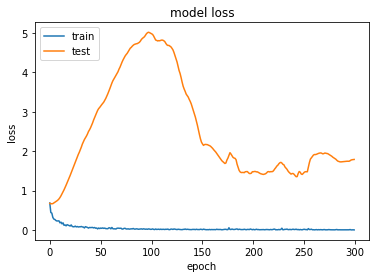

In [35]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Loss_vs_epochs.png')
plt.show()


In [36]:
# Predicting the Test set results
#y_pred = model.predict(X)
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
#print(y_pred)
#print(y_test)
#print(y)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#cm = confusion_matrix(y, y_pred)
#print(cm)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
#score=accuracy_score(y_pred,y)
#print(score)

from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))
#print(classification_report(y, y_pred))

In [37]:
#model.summary()

In [22]:
#hyperparameter tuning
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
def create_model(init_mode='uniform'):
    # define model
    model = Sequential()
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu, input_dim=784)) 
    model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu))
    model.add(Dense(10, kernel_initializer=init_mode, activation=tf.nn.softmax))
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    return model

model_CV = KerasClassifier(build_fn=create_model, epochs=200, verbose=1)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

TypeError: can't pickle _thread.RLock objects

In [63]:
import statistics

statistics.stdev([59,82,70,59,94,94,70,94,100,100,70,82,100,64,100,64,100,70,70,100])


15.897368203242753